# testing the decrease in the statndard deviation with time. 

[0.01643655489809336, 0.01643115346697338, 0.0164257555847569, 0.016420361247947456, 0.016414970453053183, 0.016409583196586808, 0.016404199475065617]


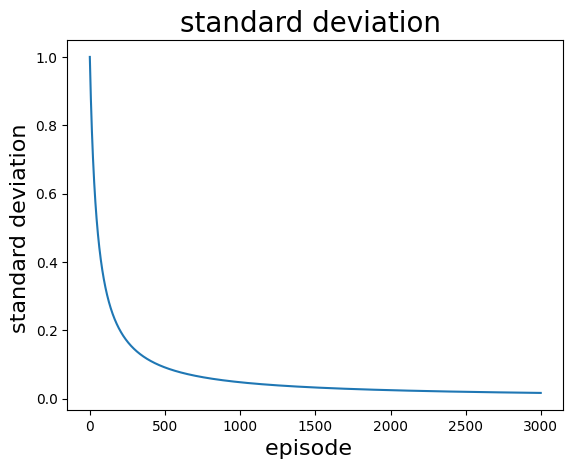

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import utils as utils 

std_i = 0.2
std = [] 
decay_std_list = [] 
x = [] 
for ep in range(0, 3000):
    decay_rate = 0.02
    decay_std = 1 * 1/(1 + decay_rate * ep)      

    decay_std_list.append(decay_std) 

    list__ = np.linspace(-7, 0, 500) 
    
    for i in list__:

        temp_std_dev =   decay_std * (abs(i))   
        std.append(temp_std_dev) 
    

    if ep % 500 == 0:
        plt.title(str(ep), fontsize=20)  
        file = utils.global_dir + "/plots/std_fig_" + str(ep) + ".png"
        # plt.plot(list__, std) 
        # plt.show() 

    std.clear() 


print(decay_std_list[-8:-1])
plt.title("standard deviation ", fontsize=20)  
plt.ylabel("standard deviation ", fontsize=16)  
plt.xlabel("episode  ", fontsize=16)  
X = list(range(len(decay_std_list)))
plt.plot(X, decay_std_list) 
file = utils.global_dir + "/data/std_fig.png" 
plt.savefig(file) 
# plt.show() 



# testing the Simulator code. 

In [2]:
import simulator 
import numpy as np 
import ploting
import utils


def simulate():

    x0 = np.array([0.2, 1.8, 78, 139]) 
    u0 = np.array([6.0, -2656]) 
    time_step = 0 
    states = []
    states.append(x0) 
    actions = [] 
    actions.append(u0) 
    for i in range(5):
        x0 = simulator.cstr_dynamics(time_step, time_step + 0.005, x0[0], 
                                    x0[1], x0[2], x0[3], 
                                    u0[0], u0[1])    
        # print(x0)  
    
        states.append(x0) 
        actions.append(u0) 
    
    states = np.array(states) 
    actions = np.array(actions) 

    file = utils.global_dir + '/data/fig__.png'  
    ploting.plot_xu(states, actions, 0, file)  


if __name__=='__main__':
    simulate() 


# test the environment 

In [ ]:
import numpy as np
import env 
import utils 

cstr = env.CSTR_Env() 
cstr.reset() 


# cstr.test() 

file = utils.global_dir + '/data/inputs.csv'  

uk = np.loadtxt(file,  delimiter=',') 



for i in range(500):
    print("itr : ", i)
    action = uk[i] 
    
    action = utils.normalize_minmax_actions(action)  
    
    obs, reward, done, info  = cstr.step(action) 

    print("obs : ", obs, "\n reward : ", reward, "\n done : ",done, "\n info : ",info) 
    print("\n\n")  

    if done:
        break 



# check the reward 

In [ ]:
import numpy as np 
import utils
import matplotlib.pyplot as plt 

def cal_reward(x_next, u_current, u_previous): 
    
    goal_state = np.array([.70, .600, 127.25, 124.39], dtype=float) 

    s_goal_state = utils.normalize_minmax_states(goal_state)

    s_x_next = utils.normalize_minmax_states(x_next)  
    
    out_p = ((s_x_next[0] - s_goal_state[0]) ** 2) + ((s_x_next[1] - s_goal_state[1]) **2) + \
                            ((s_x_next[2] - s_goal_state[2]) ** 2) + ((s_x_next[3] - s_goal_state[3]) ** 2)

    out_p = 10 * out_p 

    s_u_current = utils.normalize_minmax_actions(u_current) 
    s_u_previous = utils.normalize_minmax_actions(u_previous)

    input_p =  0.1 * ((s_u_current[0] - s_u_previous[0])**2) + 0.1 * ((s_u_current[1] - s_u_previous[1])**2)  
    

    reward = out_p + input_p 

    reward = float(-1 * reward) 

    return reward 


# r_dir = '/home/abb/Documents/Vikas/ddpg20/data/test_data/'
# mpc_dir = '/home/abb/Documents/Vikas/mpc/'



# for itr in range(10):  

#     print("iteration \n \n ", itr)
#     file1 = r_dir + 'xk' + str(itr) + '.csv' 
#     file2 = r_dir + 'uk' + str(itr) + '.csv' 

#     rl_xk = np.loadtxt(file1, delimiter=',')  
#     rl_uk = np.loadtxt(file2, delimiter=',')   

#     rl_xk = rl_xk[:, [0, 1, 2, 3]]  

#     print(rl_xk.shape) 

#     length = rl_xk.shape[0]  

#     obj_list = []   
#     for index in range(1, length-1): 

#         state  = rl_xk[index+1]    
#         u_prev = rl_uk[index-1] 
#         u_curr = rl_uk[index] 
        
#         t_obj = cal_reward(state, u_prev, u_curr)
#         obj_list.append(t_obj) 
    
#     X = list(range(len(obj_list))) 

#     plt.plot(X, obj_list)
#     plt.savefig("rl_obj.png")

#     # plt.show() 

#     obj = sum(obj_list) 
#     print("RL Objective : ", obj) 
    
#     file1 = mpc_dir + 'states' + str(itr) + '.csv' 
#     file2 = mpc_dir + 'inputs' + str(itr) + '.csv' 

#     mpc_xk = np.loadtxt(file1, delimiter=',')  
#     mpc_uk = np.loadtxt(file2, delimiter=',')  


#     print(mpc_xk.shape) 

#     length = mpc_xk.shape[0]  
    
#     obj_list = [] 

#     for index in range(1, length-1): 

#         state = mpc_xk[index+1]     
#         u_prev = mpc_uk[index-1] 
#         u_curr = mpc_uk[index] 
        
#         t_obj = cal_reward(state, u_prev, u_curr) 

#         obj_list.append(t_obj) 


#     X = list(range(len(obj_list))) 

#     plt.plot(X, obj_list) 
#     plt.savefig("mpc_obj.png")  
#     # plt.show() 
    
#     obj = sum(obj_list)   

#     print("MPC Objective : ", obj) 

    
